In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [0]:
def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat (1).h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_catvnoncat (1).h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [105]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

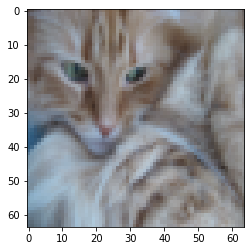

In [106]:
plt.imshow(train_set_x_orig[2])

In [107]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("no. of training example=" + str(m_train))
print("no. of test example=" + str(m_test))
print("size of picture = (" + str(num_px) + "," + str(num_px) + "," + "3)")
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_y.shape)

no. of training example=209
no. of test example=50
size of picture = (64,64,3)
(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)


In [108]:
# Reshaping the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T 

print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [0]:
#Standardize the training and test set
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [0]:
def sigmoid(z):
  return 1/ (1+np.exp(-z))

In [0]:
# initializing the parameters

def initialize_with_zeros(dim):
  w = np.zeros((dim,1), dtype=float)
  b = 0

  assert(w.shape == (dim,1))
  assert(isinstance(b,float) or isinstance(b,int))

  return w,b

In [112]:
dim = 2
w, b= initialize_with_zeros(dim)
print("w=" +str(w))
print("b=" +str(b))

w=[[0.]
 [0.]]
b=0


In [0]:
# define a function that computes cost function and its gradients

def propagate(w,b,X,y):
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X) + b)
  cost = (-1/m) * np.sum(y*np.log(A) + (1-y) * np.log(1-A))

  #backward propagation (to find grads)
  dw = (1/m) * np.dot(X, (A-y).T)
  db = (1/m) * np.sum(A-y)

  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  grads = {"dw" : dw, "db" : db}

  return cost, grads

In [114]:
w,b,X,y = np.array([[1.],[2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1,0,1]])

cost, grads = propagate(w,b,X,y)
print("dw=" +str(grads["dw"]))
print("db=" +str(grads["db"]))
print("cost =" +str(cost))

dw=[[0.99845601]
 [2.39507239]]
db=0.001455578136784208
cost =5.801545319394553


In [0]:
# optimize

def optimize(w, b, X, y, num_iterations, learning_rate, print_cost=False):

  costs =[]

  for i in range(num_iterations):
    cost, grads = propagate(w,b,X,y)
    dw = grads["dw"]
    db = grads["db"]

    w = w - learning_rate*dw
    b = b - learning_rate*db

    if i%100 == 0:
      costs.append(cost)
    
    if print_cost and i%100 == 0:
      print("Cost after iteration %i: %f" %(i,cost))

  params = {'w':w, 'b':b}
  grads = {'dw':dw, 'db':db}

  return params, grads, costs


In [116]:
params, grads, cost = optimize(w, b, X, y, num_iterations=1000, learning_rate= 0.1, print_cost=True)
print("dw=" +str(grads['dw']))
print("db=" +str(grads['db']))
print("w=" +str(params['w']))
print("b=" +str(params['b']))

Cost after iteration 0: 5.801545
Cost after iteration 100: 0.310571
Cost after iteration 200: 0.257333
Cost after iteration 300: 0.218047
Cost after iteration 400: 0.188116
Cost after iteration 500: 0.164731
Cost after iteration 600: 0.146067
Cost after iteration 700: 0.130897
Cost after iteration 800: 0.118370
Cost after iteration 900: 0.107881
dw=[[ 0.02361011]
 [-0.00585942]]
db=-0.015164913055170565
w=[[-4.09584518]
 [ 0.39595404]]
b=4.567300640760195


In [0]:
# predict

def predict(w, b, X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)

  A = sigmoid(np.dot(w.T, X) + b)
  print(A.shape)

  for i in range(A.shape[1]):
    Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0

  assert(Y_prediction.shape == (1,m))
  
  return Y_prediction




In [118]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

(1, 3)
predictions = [[1. 1. 0.]]


In [0]:
def model(x_train, x_test, y_train, y_test, num_iterations =1000, learning_rate = 0.09, print_cost = False):
  w, b = initialize_with_zeros(x_train.shape[0])
  parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)

  w = parameters["w"]
  b = parameters["b"]

  Y_prediction_test = predict(w, b, x_test)
  Y_prediction_train = predict(w, b, x_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    
  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
  return d



In [120]:
d = model(train_set_x,test_set_x,train_set_y, test_set_y, num_iterations=1000, learning_rate=0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
(1, 50)
(1, 209)
train accuracy: 96.65071770334929 %
test accuracy: 72.0 %


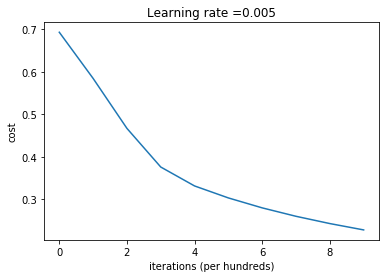

In [121]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
(1, 50)
(1, 209)
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
(1, 50)
(1, 209)
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
(1, 50)
(1, 209)
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



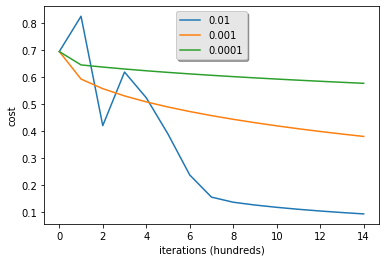

In [123]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, test_set_x, train_set_y, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()